In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Churn_Modelling (1).csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.drop('RowNumber',axis=1,inplace=True)
data.drop('CustomerId',axis=1,inplace=True)
data.drop('Surname',axis=1,inplace=True)

In [4]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.describe(include='O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


* CreditScore is normally distributed.
* France contains more geography region.
* Majority of male are in our dataset.
* Majority people's age is between 30-40.
* Majority of people have zero balance.
* People have only 1 product has the majority.
* Majority of the people has cr card.
* Majority of people havent exited.

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
df = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember','Exited']]

In [11]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data.Geography = LE.fit_transform(data.Geography)
data.Gender = LE.fit_transform(data.Gender)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data1 = data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
data2 = data[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_data = sc.fit_transform(data1)
scaled_data

array([[0.538     , 0.32432432, 0.        , 0.50673489],
       [0.516     , 0.31081081, 0.33403148, 0.56270874],
       [0.304     , 0.32432432, 0.63635718, 0.56965435],
       ...,
       [0.718     , 0.24324324, 0.        , 0.21039009],
       [0.844     , 0.32432432, 0.29922631, 0.46442905],
       [0.884     , 0.13513514, 0.51870777, 0.19091423]])

In [24]:
df2 = pd.DataFrame(scaled_data, columns=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'])
df2

,CreditScore,Age,Balance,EstimatedSalary
0,0.538,0.324324,0.000000,0.506735
1,0.516,0.310811,0.334031,0.562709
2,0.304,0.324324,0.636357,0.569654
3,0.698,0.283784,0.000000,0.469120
4,1.000,0.337838,0.500246,0.395400
...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341
9996,0.332,0.229730,0.228657,0.508490
9997,0.718,0.243243,0.000000,0.210390
9998,0.844,0.324324,0.299226,0.464429


In [34]:
final_data = pd.concat([df2,data2],axis=1)
final_data

,CreditScore,Age,Balance,EstimatedSalary,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0.538,0.324324,0.000000,0.506735,0,0,2,1,1,1,1
1,0.516,0.310811,0.334031,0.562709,2,0,1,1,0,1,0
2,0.304,0.324324,0.636357,0.569654,0,0,8,3,1,0,1
3,0.698,0.283784,0.000000,0.469120,0,0,1,2,0,0,0
4,1.000,0.337838,0.500246,0.395400,2,0,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0,1,5,2,1,0,0
9996,0.332,0.229730,0.228657,0.508490,0,1,10,1,1,1,0
9997,0.718,0.243243,0.000000,0.210390,0,0,7,1,0,1,1
9998,0.844,0.324324,0.299226,0.464429,1,1,3,2,1,0,1


<AxesSubplot:>

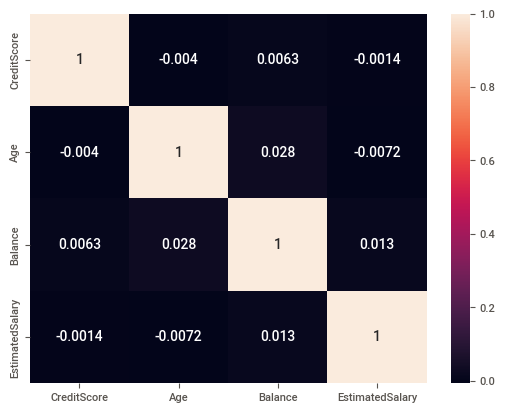

In [35]:
sns.heatmap(df2.corr(),annot=True)

In [36]:
X = final_data.iloc[:,:-1]
y = final_data['Exited']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [49]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [51]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
r2 = accuracy_score(y_test,y_pred)
r2

0.7976666666666666

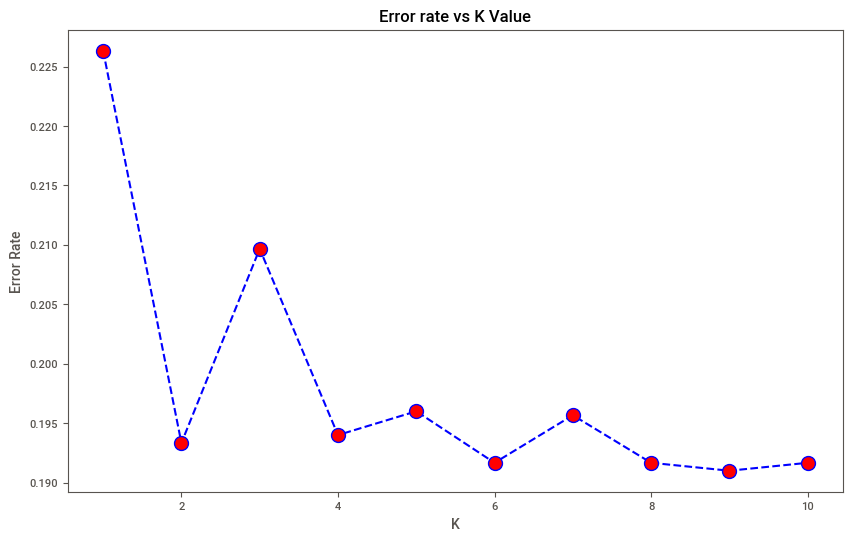

The accuracy score is : 0.804


In [53]:
# KNN

error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,11), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("The accuracy score is :",accuracy_score(y_test,y_pred))

In [54]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)
print("The accuracy score is :",accuracy_score(y_test,y_hat))

The accuracy score is : 0.788


In [55]:
# Grid Search CV on Decision Tree

from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'splitter': ['best', 'random'],  # Strategy to choose split at each node
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] 
}

tree_clf = DecisionTreeClassifier(random_state=3)

tree_cv = GridSearchCV(estimator=tree_clf, param_grid=params, cv=5)

tree_cv.fit(X_train,y_train)

best_params = tree_cv.best_params_ 

print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'})


In [62]:
# Decision Tree regressor with best hyperparameter

dt1=DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 1, min_samples_split= 5, splitter= 'best')
dt1.fit(X_train,y_train)
y_hat1=dt1.predict(X_test)
acc2=accuracy_score(y_test,y_hat1)
acc2

0.852

In [63]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)
acc2=accuracy_score(y_test,y_predict)
acc2

0.854

In [64]:
# Randomized Search CV with Random Forest

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=1, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False})


In [65]:
# Random Forest

rf_clf2 = RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 70, bootstrap= False) #passing best parameter to randomforest
rf_clf2.fit(X_train, y_train) #training 
y_predict=rf_clf2.predict(X_test) #testing
acc=accuracy_score(y_test,y_predict)
acc

0.855

In [66]:
# Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.8623333333333333

In [67]:
# XGBoost

from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)
accu_scor=accuracy_score(y_test,y_hat)
accu_scor

0.848

In [68]:
# Randomized Search CV with XGBoost

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 11, 'learning_rate': 0.7, 'gamma': 0})


In [70]:
# XGBoost with hyperparameter

XGB2 = XGBClassifier(reg_lambda=1.6, reg_alpha=12.8, n_estimators=50, max_depth=11, learning_rate=0.7, gamma=0)
XGB2.fit(X_train, y_train)  # Training
y_predict = XGB2.predict(X_test)  # Testing
acc = accuracy_score(y_test,y_predict) 
acc

0.8573333333333333

In [71]:
# ANN

from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
model.fit(X_train,y_train) ## training the data
y_predict = model.predict(X_test)
print("Test accuracy :",accuracy_score(y_test,y_predict))

Test accuracy : 0.8476666666666667
